In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True,
                                        transform=transforms.ToTensor())

100%|██████████| 170M/170M [00:03<00:00, 55.9MB/s]


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [15]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


In [17]:
img = images[3]
print(type(img))

<class 'torch.Tensor'>


In [18]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [19]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


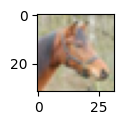

In [20]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [21]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

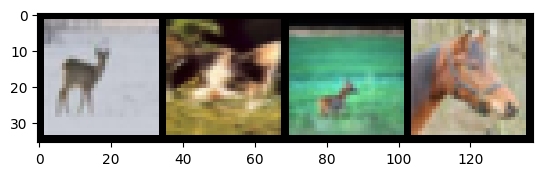

deer cat deer horse


In [22]:
imshow(torchvision.utils.make_grid(images))
print(' '.join([classes[labels[j]] for j in range(4)]))

In [23]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))

    def forward(self, x):
        x = self.conv1(x)
        return x

In [24]:
net = FirstCNN()

In [25]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

In [26]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [27]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


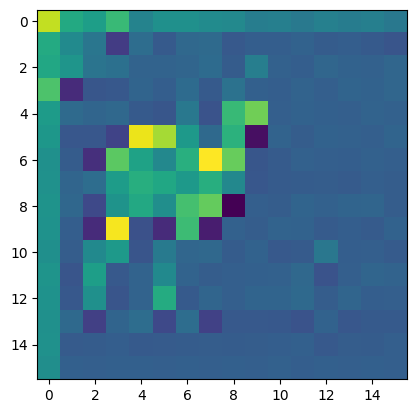

In [28]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

In [29]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [30]:
net = FirstCNN_v2()
out = net(images)
out.shape


torch.Size([4, 16, 28, 28])

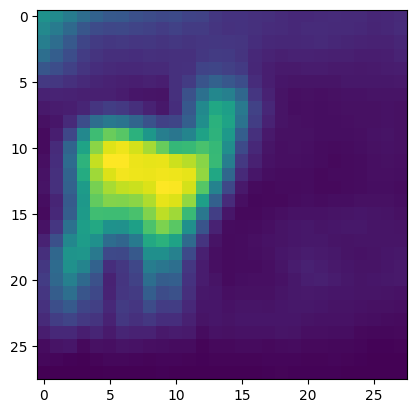

In [31]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [32]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [33]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

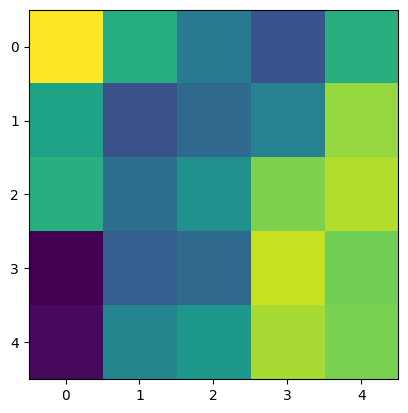

In [34]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [35]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [36]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [37]:
print(out)

tensor([[-0.0781, -0.0017,  0.0308,  0.0839,  0.0578, -0.0124, -0.0059, -0.0888,
          0.0083,  0.0364],
        [-0.0740, -0.0085,  0.0260,  0.1013,  0.0226,  0.0107, -0.0133, -0.0951,
          0.0178,  0.0178],
        [-0.0905, -0.0042,  0.0394,  0.1008,  0.0523,  0.0054, -0.0044, -0.0831,
          0.0162,  0.0165],
        [-0.0749, -0.0075,  0.0226,  0.0969,  0.0546, -0.0143, -0.0119, -0.0855,
          0.0085,  0.0288]], grad_fn=<AddmmBackward0>)


In [38]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([3, 3, 3, 3])


In [39]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )

    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [40]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [41]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [42]:
net = LeNet()

In [43]:
import torch.optim as optim
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 37.87, Train acc: 38.23
Epoch: 1/16, Test acc: 43.69, Train acc: 43.78
Epoch: 2/16, Test acc: 46.26, Train acc: 47.61
Epoch: 3/16, Test acc: 49.66, Train acc: 50.95
Epoch: 4/16, Test acc: 50.69, Train acc: 52.88
Epoch: 5/16, Test acc: 52.35, Train acc: 55.40
Epoch: 6/16, Test acc: 52.38, Train acc: 56.20
Epoch: 7/16, Test acc: 53.33, Train acc: 58.18
Epoch: 8/16, Test acc: 53.35, Train acc: 58.57
Epoch: 9/16, Test acc: 54.62, Train acc: 60.78
Epoch: 10/16, Test acc: 55.07, Train acc: 61.83
Epoch: 11/16, Test acc: 55.28, Train acc: 62.16
Epoch: 12/16, Test acc: 55.72, Train acc: 63.49
Epoch: 13/16, Test acc: 54.75, Train acc: 63.50
Epoch: 14/16, Test acc: 55.14, Train acc: 65.04
Epoch: 15/16, Test acc: 54.87, Train acc: 65.13


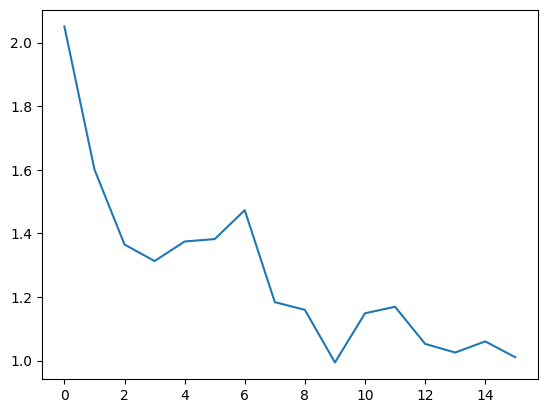

CPU times: user 9min 52s, sys: 0 ns, total: 9min 52s
Wall time: 9min 55s


In [44]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))


plt.plot(loss_epoch_arr)
plt.show()